# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [5]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [6]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [7]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [8]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [9]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [10]:
new_df = df.loc[:, ('sex', 'salary')]

In [11]:
new_df.head()

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500


Finding the Median salary for all males

In [12]:
df.groupby('sex').median()['salary']

sex
Female    103750.0
Male      108043.0
Name: salary, dtype: float64

Finding the Median salary for all females

In [13]:
df.groupby('sex').median()['salary']

sex
Female    103750.0
Male      108043.0
Name: salary, dtype: float64

Comparing the Mean salary of Males and Females

In [14]:
df.groupby('sex').mean()['salary']

sex
Female    101002.410256
Male      115090.418994
Name: salary, dtype: float64

In [15]:
# The difference between mean salaries of male and female
ms = df.groupby('sex').mean()['salary']
print(f'${round(ms[1] - ms[0], 2)}')

$14088.01


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [16]:
df.head(1)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750


In [17]:
df.loc[df['yrs.service'] >= 20].count()['salary']

157

In [18]:
df.loc[df['yrs.service'] >= 20].mean()['salary']

122520.65605095541

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [19]:
more_20 = df.loc[df['yrs.service'] >= 20].mean()['salary']
less_20 = df.loc[df['yrs.service'] < 20].mean()['salary']
print(f'${round(more_20 - less_20, 2)}')

$14580.15


People who have salary of greater than or equal to 200,000

In [20]:
df.loc[df['salary'] >= 200000]

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


Your Findings here...


# Rename values, subset columns, etc

In [21]:
df.loc[:, 'id'] = df.loc[:, 'Unnamed: 0']

In [22]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
cols = list(df.columns)
df = df[[cols[-1]] + cols[:-1]]

# Create some simple visualizations showing some simple statistics

In [24]:
df.head()

,id,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [25]:
df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [26]:
df.groupby('rank').mean()['salary']

rank
AssocProf     93876.437500
AsstProf      80775.985075
Prof         126772.109023
Name: salary, dtype: float64

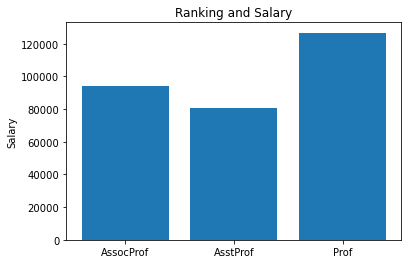

In [27]:
ranks = np.sort(df['rank'].unique())
salaries = df.groupby('rank').mean()['salary']

plt.bar(ranks, salaries)
plt.title('Ranking and Salary')
plt.ylabel('Salary')
plt.show()

In [28]:
prof_only = df.loc[df['rank'] == 'Prof']

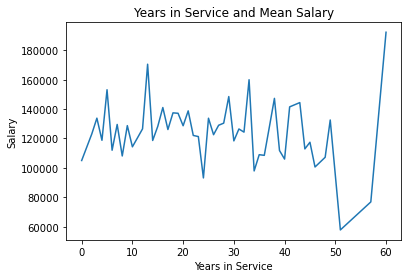

In [29]:
salaries = prof_only.groupby('yrs.service').mean()['salary']
years = np.sort(prof_only['yrs.service'].unique())

plt.plot(years, salaries)
plt.title('Years in Service and Mean Salary')
plt.xlabel('Years in Service')
plt.ylabel('Salary')
plt.show()

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:


The rank 'Prof' has the highest averge salary.

The mean averge salary of 'Prof' begins to shoot up after 50 years in service.
